# NetworkX Introduction - Lab

## Introduction

In this lab, you'll practice some of the introductory skills for NetworkX introduced in the previous lesson.
To do this, you'll create a graph to visualize users and businesses from yelp reviews.
## Objectives

You will be able to:
* Create basic network graphs using NetworkX
* Add nodes to network graphs with NetworkX
* Add edges to network graphs with NetworkX
* Visualize network graphs with NetworkX

## Import the Data

To start, import the data stored in the file 'Yelp_reviews.csv'

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Yelp_reviews.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,7SO_rX1F6rQEl-5s3wZxgQ,2011-10-03,GxaYFCprt-wyqO--vB4PHQ,4,"After my last review, somewhat scathing regard...",review,J3I2NClEbD1Xr8lOdjxlqQ,1,2,1
1,K2_Hmmo5crTYWiT_1sWnfQ,2011-12-22,FSrIgThMfFIh__TubVQkxw,3,"Ok, so I'm catching up on past-due reviews. F...",review,J3I2NClEbD1Xr8lOdjxlqQ,0,0,0
2,FeI75xIG8PF_XZ6P80gLBQ,2012-06-04,eeJ10gamdNebtq028i0BvA,3,"I want to like Turf, but the food is just okay...",review,64YY0h0ZAR2nbzxbx0IwJg,2,1,0
3,6imLt53br7SJ3av07jjH7w,2012-11-06,SPDbkT9WXghJedf1xxYnOg,5,It's the place to be. \r\n\r\nI went before he...,review,Ypz7hxOCnrg8Y8vxHJU-sQ,0,0,0
4,zmFc8M-hS4uuyY0hklIpoQ,2011-01-17,A2lCUSvDJfIa5kwUoFFk8A,4,A definite favorite in the neighborhood.\r\n\r...,review,nDBly08j5URmrHQ2JCbyiw,2,3,2


## Creating a Graph

Now, create an initial graph!

In [3]:
g = nx.Graph()

## Adding Nodes

Create a node for each user and each business in the dataset. Networks with multiple node types like this are called **bimodal networks**.

Optionally, go further by creating a list of colors for when you visualize the graph. If you do this, append the color "green" to your color list every time you add a user node and append the color "blue" to your color list every time you add a business node.

In [5]:
names = {}
node_color = []
for n, person in enumerate(df.user_id.unique()):
    name = "User{}".format(n)
    names[person] = name
    g.add_node(name)
    node_color.append("green")
for n, biz in enumerate(df.business_id.unique()):
    name = "Business{}".format(n)
    names[biz] = name
    g.add_node(name)
    node_color.append("blue")

## Adding Edges

Next, iterate through the dataset and create an edge between users and the businesses they have reviewed.

In [7]:
for row in df.index:
    user = df['user_id'][row]
    u_name = names[user]
    biz = df['business_id'][row]
    b_name = names[biz]
    g.add_edge(u_name, b_name)

## Visualizing the Graph

Finally, create a visualization of your network. If you chose to color your nodes, pass the list of colors through the optional `node_color` parameter.

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


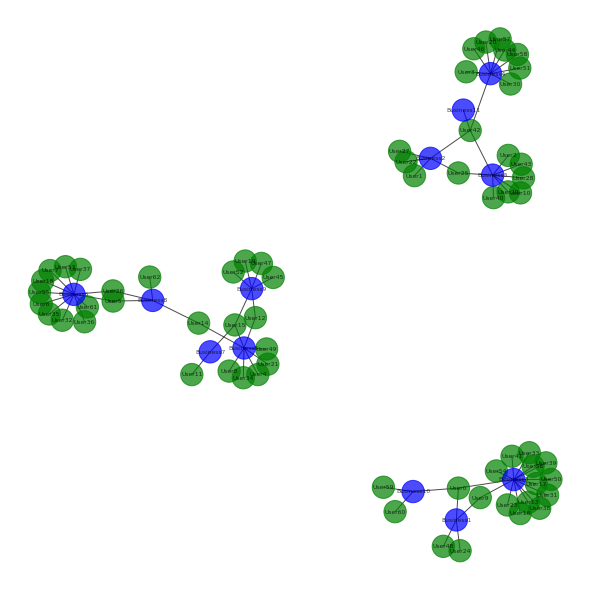

In [11]:
plt.figure(figsize=(8,8))
nx.draw(g, with_labels=True, alpha=.7, font_size=6, node_size=500, node_color=node_color)

## Summary

Nice work! In this lab you created an initial network to visualize a bimodal network of businesses and yelp reviewers!